# Implementação do modelo convolucional

Implementar modelo convolucional para predição de subidas.

Problema: De acordo com as 10 últimos valores de fechamento, o próximo valor irá subir ou descer?

Entradas: close das 10 ultimas operações

Saída: Subiu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_frame = pd.read_csv("/content/drive/MyDrive/9P/DSC/datasets/WINN_M1.csv",sep='\t')

In [ ]:
from torch.utils.data import Dataset 

In [ ]:
data_frame.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2020.10.15,11:49:00,98565,98575,98530,98575,2373,9001,5
1,2020.10.15,11:50:00,98570,98625,98570,98600,5483,19111,5
2,2020.10.15,11:51:00,98595,98600,98535,98580,4572,17663,5
3,2020.10.15,11:52:00,98575,98620,98535,98615,3536,13143,5
4,2020.10.15,11:53:00,98620,98625,98575,98610,3729,13702,5


In [ ]:
data_frame.loc[lambda data_frame1: (data_frame['<OPEN>'] - data_frame['<CLOSE>']) > 10, "Subiu"] = 0
data_frame.loc[lambda data_frame1: (data_frame['<CLOSE>'] - data_frame['<OPEN>']) > 10, "Subiu"] = 1
data_frame.loc[lambda data_frame1: ((data_frame['<OPEN>'] >= data_frame['<CLOSE>'] - 10) & (data_frame['<OPEN>'] <= (data_frame['<CLOSE>'] + 10))), "Subiu"] = 2
data_frame.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,Subiu
0,2020.10.15,11:49:00,98565,98575,98530,98575,2373,9001,5,2.0
1,2020.10.15,11:50:00,98570,98625,98570,98600,5483,19111,5,1.0
2,2020.10.15,11:51:00,98595,98600,98535,98580,4572,17663,5,0.0
3,2020.10.15,11:52:00,98575,98620,98535,98615,3536,13143,5,1.0
4,2020.10.15,11:53:00,98620,98625,98575,98610,3729,13702,5,2.0


In [ ]:
data_frame.loc[lambda data_frame: data_frame['Subiu'] == 1]

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,Subiu
1,2020.10.15,11:50:00,98570,98625,98570,98600,5483,19111,5,1.0
3,2020.10.15,11:52:00,98575,98620,98535,98615,3536,13143,5,1.0
5,2020.10.15,11:54:00,98610,98655,98590,98655,5040,17128,5,1.0
7,2020.10.15,11:56:00,98615,98675,98585,98660,5008,17128,5,1.0
10,2020.10.15,11:59:00,98655,98685,98630,98670,2799,10529,5,1.0
...,...,...,...,...,...,...,...,...,...,...
171013,2022.02.07,18:01:00,112215,112305,112185,112275,1593,24303,0,1.0
171019,2022.02.07,18:07:00,112170,112190,112160,112185,680,5548,0,1.0
171023,2022.02.07,18:11:00,112170,112250,112160,112230,1262,17338,0,1.0
171031,2022.02.07,18:19:00,112200,112260,112180,112235,894,10658,0,1.0


In [ ]:
c = pd.DataFrame()

for x in range(0, data_frame.shape[0] - 300, 300):
  b = pd.DataFrame(data_frame.loc[x:(x+299), '<CLOSE>'])
  b = b.reset_index()
  b = b.drop(['index'], axis=1)
  c = pd.concat([c,b.T])

beta = [data_frame.loc[x, 'Subiu'] for x in range(300, data_frame.shape[0], 300)]
c = (c.T / c.T.max()).T

c['label'] = beta

In [ ]:
c = c.reset_index()
c = c.drop(['index'],axis= 1)

In [ ]:
c = c.drop(c.loc[lambda c: c['label'] == 2].index,axis= 0)
c = c.reset_index()
c = c.drop(['index'],axis= 1)

In [ ]:
a = pd.DataFrame()

for x in range(0, data_frame.shape[0] - 10, 10):
  b = pd.DataFrame(data_frame.loc[x:(x+9), '<CLOSE>'])
  b = b.reset_index()
  b = b.drop(['index'], axis=1)
  a = pd.concat([a,b.T])

alpha = [data_frame.loc[x, 'Subiu'] for x in range(10, data_frame.shape[0], 10)]
a = (a.T / a.T.max()).T

a['label'] = alpha

In [ ]:
a = a.reset_index()
a = a.drop(['index'],axis= 1)

In [ ]:
a.head()

,0,1,2,3,4,5,6,7,8,9,label
0,0.999138,0.999392,0.999189,0.999544,0.999493,0.999949,0.999544,1.000000,1.000000,0.999949,1.0
1,0.996566,0.996516,0.997980,0.997829,0.997879,0.998031,0.998283,0.998990,0.999647,1.000000,0.0
2,1.000000,0.999545,0.999495,0.999394,0.998838,0.998737,0.999040,0.998838,0.999192,0.999343,0.0
3,0.998888,0.998838,0.999141,0.999444,0.999495,0.999848,1.000000,0.999949,0.999596,0.999444,2.0
4,0.999293,0.999747,0.999596,1.000000,0.999798,0.999848,0.999798,0.999798,1.000000,0.999646,2.0


In [ ]:
a.loc[lambda a: a['label'] == 2]

,0,1,2,3,4,5,6,7,8,9,label
3,0.998888,0.998838,0.999141,0.999444,0.999495,0.999848,1.000000,0.999949,0.999596,0.999444,2.0
4,0.999293,0.999747,0.999596,1.000000,0.999798,0.999848,0.999798,0.999798,1.000000,0.999646,2.0
6,0.998588,0.999496,0.998941,0.999798,0.999697,0.999647,1.000000,0.999395,0.999546,0.999294,2.0
7,1.000000,0.999495,0.999445,0.999344,0.999344,0.999495,0.999293,0.999495,0.999243,0.999041,2.0
10,0.999190,0.999595,1.000000,0.999545,0.999393,0.998280,0.998786,0.998988,0.999190,0.999292,2.0
...,...,...,...,...,...,...,...,...,...,...,...
17090,0.999644,0.999378,0.999289,0.999244,0.999511,0.999422,0.999600,0.999644,0.999911,1.000000,2.0
17091,0.999822,0.999644,0.999422,0.999511,0.999378,0.999244,0.999511,0.999689,0.999867,1.000000,2.0
17095,0.999822,0.999956,0.999378,0.999645,0.999556,0.999556,1.000000,0.999867,0.999911,0.999689,2.0
17096,0.999067,0.999156,0.999245,0.999645,1.000000,0.999822,0.999956,0.999822,0.999689,0.999689,2.0


In [ ]:
a = a.drop(a.loc[lambda a: a['label'] == 2].index,axis= 0)
a = a.reset_index()
a = a.drop(['index'],axis= 1)

In [ ]:
class DadosFinanceiros(Dataset):
    def __init__(self, dataframe):
        self.tabela = dataframe
        self.x = torch.tensor(self.tabela.iloc[:, :-1].values, dtype= torch.float32)
        self.y = torch.tensor(self.tabela['label'].values, dtype= torch.float32)

    def __len__(self):
      return len(self.x)

    def __getitem__(self, index):
      return self.x[index], self.y[index]

In [ ]:
# Criar dataset
operacoesA = DadosFinanceiros(a)
operacoesC = DadosFinanceiros(c)

In [ ]:
# Dividir treino e teste
tamanho_treinoA = int(0.7*len(operacoesA))
tamanho_validacaoA = int(0.1*len(operacoesA))
tamanho_testeA = len(operacoesA)-tamanho_treinoA-tamanho_validacaoA

ds_treinoA, ds_validacaoA, ds_testeA = torch.utils.data.random_split(operacoesA, [tamanho_treinoA,
                                                                               tamanho_validacaoA,
                                                                               tamanho_testeA])

In [ ]:
tamanho_treinoC = int(0.7*len(operacoesC))
tamanho_validacaoC = int(0.1*len(operacoesC))
tamanho_testeC = len(operacoesC)-tamanho_treinoC-tamanho_validacaoC

ds_treinoC, ds_validacaoC, ds_testeC = torch.utils.data.random_split(operacoesC, [tamanho_treinoC,
                                                                               tamanho_validacaoC,
                                                                               tamanho_testeC])

In [ ]:
# Fazer dataloader
batch_size = 64

loader_treinoA = torch.utils.data.DataLoader(ds_treinoA, batch_size= batch_size,
                                            shuffle= True)
loader_validacaoA = torch.utils.data.DataLoader(ds_validacaoA, batch_size= batch_size,
                                            shuffle= True)
loader_testeA = torch.utils.data.DataLoader(ds_testeA, batch_size= batch_size,
                                            shuffle= False)

In [ ]:
# Fazer dataloader
batch_size = 64

loader_treinoC = torch.utils.data.DataLoader(ds_treinoC, batch_size= batch_size,
                                            shuffle= True)
loader_validacaoC = torch.utils.data.DataLoader(ds_validacaoC, batch_size= batch_size,
                                            shuffle= True)
loader_testeC = torch.utils.data.DataLoader(ds_testeC, batch_size= batch_size,
                                            shuffle= False)

In [ ]:
dataiter = iter(loader_treinoA)
dados, labels = dataiter.next()

print(dados, labels)
print(dados.shape)

tensor([[0.9990, 0.9990, 0.9989, 0.9990, 0.9990, 0.9989, 0.9993, 0.9991, 1.0000,
         0.9999],
        [0.9991, 0.9991, 0.9984, 0.9989, 1.0000, 0.9994, 0.9989, 0.9990, 0.9986,
         0.9980],
        [0.9991, 0.9989, 0.9991, 1.0000, 0.9998, 0.9994, 0.9990, 0.9991, 0.9994,
         0.9991],
        [0.9994, 0.9994, 0.9998, 0.9998, 1.0000, 0.9995, 0.9987, 0.9990, 0.9993,
         0.9994],
        [0.9994, 0.9986, 0.9992, 0.9982, 0.9987, 0.9996, 1.0000, 0.9977, 0.9975,
         0.9942],
        [0.9992, 0.9987, 0.9992, 1.0000, 0.9996, 0.9979, 0.9993, 0.9987, 0.9988,
         0.9990],
        [1.0000, 0.9998, 0.9996, 0.9990, 0.9989, 0.9986, 0.9993, 0.9980, 0.9981,
         0.9975],
        [0.9977, 0.9977, 0.9969, 0.9987, 0.9990, 1.0000, 0.9995, 0.9991, 0.9988,
         0.9992],
        [0.9993, 0.9993, 0.9994, 0.9995, 0.9996, 0.9995, 0.9997, 0.9998, 1.0000,
         0.9999],
        [1.0000, 0.9999, 0.9995, 0.9991, 0.9985, 0.9985, 0.9989, 0.9991, 0.9993,
         0.9994],
        [1

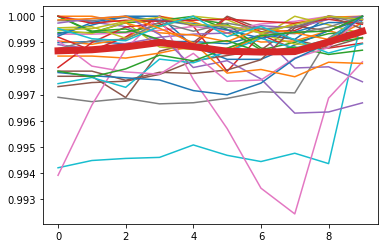

In [ ]:
plt.plot(dados[labels==0,:].T);
plt.plot(dados[labels==0,:].T.mean(axis=1),linewidth=7);

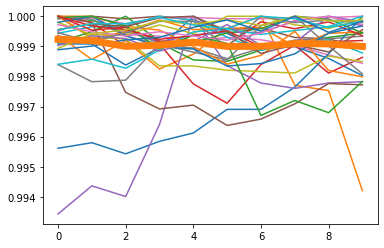

In [ ]:
plt.plot(dados[labels==1,:].T);
plt.plot(dados[labels==1,:].T.mean(axis=1),linewidth=7);

In [ ]:
dataiter = iter(loader_treinoC)
dados, labels = dataiter.next()

print(dados, labels)
print(dados.shape)

tensor([[0.9797, 0.9803, 0.9800,  ..., 0.9900, 0.9911, 0.9917],
        [0.9986, 0.9987, 0.9985,  ..., 0.9958, 0.9952, 0.9946],
        [0.9970, 0.9970, 0.9968,  ..., 0.9891, 0.9896, 0.9904],
        ...,
        [0.9907, 0.9908, 0.9907,  ..., 0.9987, 0.9981, 0.9979],
        [0.9952, 0.9949, 0.9947,  ..., 0.9985, 0.9984, 0.9984],
        [0.9600, 0.9606, 0.9601,  ..., 0.9865, 0.9850, 0.9857]]) tensor([1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
        0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 0., 0., 0., 1., 1., 0., 0., 0.])
torch.Size([64, 300])


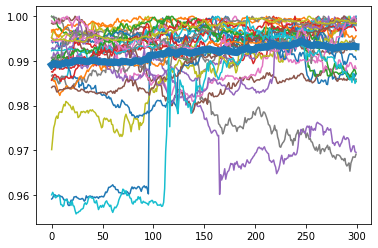

In [ ]:
plt.plot(dados[labels==0,:].T);
plt.plot(dados[labels==0,:].T.mean(axis=1),linewidth=7);

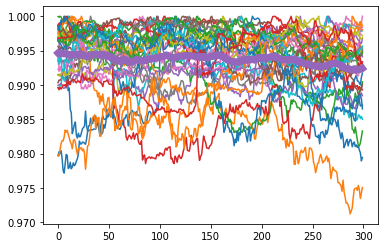

In [ ]:
plt.plot(dados[labels==1,:].T);
plt.plot(dados[labels==1,:].T.mean(axis=1),linewidth=7);

In [ ]:
from torch import nn
import torch.nn.functional as F

In [ ]:
tem_gpu = torch.cuda.is_available()

if not tem_gpu:
  print("Treinaremos na CPU")
else:
  print("Treinaremos da GPU")

Treinaremos da GPU


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(1, 5, 3, padding=1)
        self.conv2 = nn.Conv1d(5, 10, 3, padding=1)
        self.conv3 = nn.Conv1d(10, 15, 5, padding=2)

        self.pool = nn.MaxPool1d(2, stride= 2)

        self.fc1 = nn.Linear(30, 30)
        self.fc2 = nn.Linear(30, 10)
        self.fc3 = nn.Linear(10, 1)


    def forward(self, x):
        x = x.view(len(x),1,-1)

        x = self.pool(F.leaky_relu(self.conv1(x)))
        x = self.pool(F.leaky_relu(self.conv2(x)))
        x = F.leaky_relu(self.conv3(x))
        
        x = x.view(x.size(0), -1)


        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))

        return x

# create a complete CNN
model = Net()
print(model)

# move tensors to GPU if CUDA is available
if tem_gpu:
    model.cuda()

Net(
  (conv1): Conv1d(1, 5, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(5, 10, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv3): Conv1d(10, 15, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=30, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
)


In [ ]:
lr = 0.001

criterion = nn.BCELoss()

optmizer = torch.optim.SGD(model.parameters(), lr= lr)


In [ ]:
def train_model(nEpochs = 60):
    train_loss_list =[]
    valid_loss_list = []

    valid_loss_min = np.Inf # Minimo valid loss

    for epoch in range(nEpochs):
        train_loss= 0
        validation_loss= 0

        model.train()
        for sample, target in loader_treinoA:
            if tem_gpu:
                sample, target = sample.cuda(), target.cuda()

            target = target.unsqueeze(1)
        # Zerar o gradiente
            optmizer.zero_grad()
        # Gera saída do modelo
            outputs = model(sample)
        # Calcula o erro
            loss = criterion(outputs, target)
            train_loss+=loss.item()*sample.size(0)
        # Calcula os gradientes
            loss.backward()
        # Otimiza o modelo
            optmizer.step()
            
        model.eval()
        for data, target in loader_validacaoA:
            # move tensors to GPU if CUDA is available
            if tem_gpu:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            target = target.unsqueeze(1)
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            validation_loss += loss.item()*data.size(0)

        train_loss = train_loss/len(loader_treinoA.dataset)
        train_loss_list.append(train_loss)
        
        validation_loss = validation_loss/len(loader_treinoA.dataset)
        valid_loss_list.append(validation_loss)
      
        if (not epoch%5):
            print(f"Época: {epoch} \nLoss Treino: {train_loss}")
            print(f"Loss validação: {validation_loss}")

        if validation_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min, validation_loss))
            torch.save(model.state_dict(), 'modelo1.pt')
            valid_loss_min = validation_loss

    return train_loss_list, valid_loss_list

In [ ]:
trained_data, validated_data = train_model(50)

Época: 0 
Loss Treino: 0.6933176603081576
Loss validação: 0.09906864739547232
Validation loss decreased (inf --> 0.099069).  Saving model ...
Validation loss decreased (0.099069 --> 0.099065).  Saving model ...
Validation loss decreased (0.099065 --> 0.099061).  Saving model ...
Validation loss decreased (0.099061 --> 0.099058).  Saving model ...
Validation loss decreased (0.099058 --> 0.099054).  Saving model ...
Época: 5 
Loss Treino: 0.6932489152781671
Loss validação: 0.09905160481980473
Validation loss decreased (0.099054 --> 0.099052).  Saving model ...
Validation loss decreased (0.099052 --> 0.099049).  Saving model ...
Validation loss decreased (0.099049 --> 0.099046).  Saving model ...
Validation loss decreased (0.099046 --> 0.099044).  Saving model ...
Validation loss decreased (0.099044 --> 0.099042).  Saving model ...
Época: 10 
Loss Treino: 0.6932063277296163
Loss validação: 0.09903969506464702
Validation loss decreased (0.099042 --> 0.099040).  Saving model ...
Validation 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
def createCM(loader,model,nClasses):
  model.eval()

  accuracy = 0
  CM = np.zeros((nClasses,nClasses))
  y_pred = []
  y_true = []

  for sample1, target1 in loader:

    if tem_gpu:
      sample1, target1 = sample1.cuda(), target1.cuda()
      model.cuda()

    prediction = model(sample1)
    outputsClass = torch.argmax(prediction, dim=1)

    if tem_gpu:
      yt = np.array([t.cpu().numpy() for t in outputsClass])
      yp = np.array([t.cpu().numpy() for t in target1])

    else:
      yt = np.array([t.numpy() for t in outputsClass])
      yp = np.array([t.numpy() for t in target1])
      
    for x in range(len(yp)):
      y_pred.append(yp.item(x))
    for x in range(len(yt)):
      y_true.append(yt.item(x))

  CM = confusion_matrix(y_true, y_pred)
  accuracy = accuracy_score(y_true, y_pred)
  return CM, accuracy

In [ ]:
matriz, acuracia = createCM(loader_testeA,model,2)
matriz

array([[1261, 1306],
       [   0,    0]])

In [ ]:
acuracia

0.4912349045578496

Não reconhece padrão

In [ ]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, 16, padding=1)
        self.conv2 = nn.Conv1d(64, 128, 8, padding=1)
        self.conv3 = nn.Conv1d(128, 256, 4, padding=1)

        self.pool = nn.MaxPool1d(2, stride= 2)

        self.fc1 = nn.Linear(17408, 900)
        self.fc2 = nn.Linear(900, 300)
        self.fc3 = nn.Linear(300, 1)


    def forward(self, x):
        x = x.view(len(x),1,-1)

        x = self.pool(F.leaky_relu(self.conv1(x)))
        x = self.pool(F.leaky_relu(self.conv2(x)))
        x = F.leaky_relu(self.conv3(x))
        
        x = x.view(x.size(0), -1)


        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))

        return x

# create a complete CNN
model2 = Net2()
print(model2)

# move tensors to GPU if CUDA is available
if tem_gpu:
    model2.cuda()

Net2(
  (conv1): Conv1d(1, 64, kernel_size=(16,), stride=(1,), padding=(1,))
  (conv2): Conv1d(64, 128, kernel_size=(8,), stride=(1,), padding=(1,))
  (conv3): Conv1d(128, 256, kernel_size=(4,), stride=(1,), padding=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=17408, out_features=900, bias=True)
  (fc2): Linear(in_features=900, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=1, bias=True)
)


In [ ]:
lr = 0.001

criterion = nn.BCELoss()

optmizer = torch.optim.SGD(model2.parameters(), lr= lr)


In [ ]:
def train_model2(nEpochs = 60):
    train_loss_list =[]
    valid_loss_list = []

    valid_loss_min = np.Inf # Minimo valid loss

    for epoch in range(nEpochs):
        train_loss= 0
        validation_loss= 0

        model2.train()
        for sample, target in loader_treinoC:
            if tem_gpu:
                sample, target = sample.cuda(), target.cuda()

            target = target.unsqueeze(1)
        # Zerar o gradiente
            optmizer.zero_grad()
        # Gera saída do model2o
            outputs = model2(sample)
        # Calcula o erro
            loss = criterion(outputs, target)
            train_loss+=loss.item()*sample.size(0)
        # Calcula os gradientes
            loss.backward()
        # Otimiza o modelo
            optmizer.step()
            
        model2.eval()
        for data, target in loader_validacaoC:
            # move tensors to GPU if CUDA is available
            if tem_gpu:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            target = target.unsqueeze(1)
            output = model2(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            validation_loss += loss.item()*data.size(0)

        train_loss = train_loss/len(loader_treinoC.dataset)
        train_loss_list.append(train_loss)
        
        validation_loss = validation_loss/len(loader_treinoC.dataset)
        valid_loss_list.append(validation_loss)
      
        if (not epoch%5):
            print(f"Época: {epoch} \nLoss Treino: {train_loss}")
            print(f"Loss validação: {validation_loss}")

        if validation_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min, validation_loss))
            torch.save(model2.state_dict(), 'modelo1.pt')
            valid_loss_min = validation_loss

    return train_loss_list, valid_loss_list

In [ ]:
trained_data2, validated_data2 = train_model2(100)

Época: 0 
Loss Treino: 0.694799244813493
Loss validação: 0.09750109951930358
Validation loss decreased (inf --> 0.097501).  Saving model ...
Validation loss decreased (0.097501 --> 0.097501).  Saving model ...
Validation loss decreased (0.097501 --> 0.097501).  Saving model ...
Validation loss decreased (0.097501 --> 0.097501).  Saving model ...
Validation loss decreased (0.097501 --> 0.097501).  Saving model ...
Época: 5 
Loss Treino: 0.6947992607899958
Loss validação: 0.09750109951930358
Validation loss decreased (0.097501 --> 0.097501).  Saving model ...
Validation loss decreased (0.097501 --> 0.097501).  Saving model ...
Validation loss decreased (0.097501 --> 0.097501).  Saving model ...
Validation loss decreased (0.097501 --> 0.097501).  Saving model ...
Validation loss decreased (0.097501 --> 0.097501).  Saving model ...
Época: 10 
Loss Treino: 0.6947992501389939
Loss validação: 0.09750109951930358
Validation loss decreased (0.097501 --> 0.097501).  Saving model ...
Validation l

In [ ]:
matriz, acuracia = createCM(loader_testeC,model2,2)
matriz

array([[41, 43],
       [ 0,  0]])

In [ ]:
acuracia